# WER & BLEU Calculation Notebook
The following calculates and plots BLEU/WER data

In [1]:
import nltk
from nltk.tokenize.punkt import PunktSentenceTokenizer
tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
import string
import json
from jiwer import wer
#matploblib imports used below when needed

## WER

## Open Data (ADJUST TO PROPER PATHS!)

In [2]:
#asr'd data
with open('QBASR/asr_qanta.test.2018.04.18.json') as asr:
    asr_data = json.load(asr)['questions']

#original qanta data
with open('QBASR/qanta.test.2018.04.18.json') as clean:
    clean_data = json.load(clean)['questions'] 

In [3]:
sentences =  [item['sentences'] for item in asr_data]
cleaned_p = []
#cleaned_s = []
for q in sentences:
    cleaned = []
    for sentence in q:
        joined = ' '.join(sentence)
        joined = joined.replace("'", "")
        cleaned.append(joined)
        #cleaned_s.append(joined)
    paragraph = ' '.join(cleaned)
    cleaned_p.append(paragraph)     
print(len(cleaned_p))

2151


In [4]:
orig_p = []
#orig_s = []    
for q in clean_data:
    orig = []
    if q['fold'] == 'guesstest':
        for sent in q['tokenizations']:
                sentence = q['text'][sent[0]:sent[1]]
                sentence = sentence.translate(str.maketrans('', '', string.punctuation))
                orig.append(sentence.lower())
                #also store in sentence level comparison.  Not used though
                #orig_s.append(sentence.lower())
        orig_paragraph = ' '.join(orig)
        orig_p.append(orig_paragraph)
        
print(len(orig_p))

2151


In [5]:
#sanity check
print (orig_p[:1])
print('\n')
print(cleaned_p[:1])

['the lines rude and ungrateful though my country be in book 5 of this work alludes to scipio africanus as a reference to its authors multiple exiles the main characters of this work encounter a figure whose black lips part to reveal blue rows of gnashing teeth  its central character is brought to a mountaintop and listens to a set of speeches by the nereid thetis after arriving at the isle of joy this work concludes with an apostrophe to the king of a nation whose history is recounted to the king of melinda in the third fourth and fifth books of this work a character in this work who used to rule over the indian ocean first appears as a storm and guards the cape of good hope bacchus and venus feud over a group of sailors in this work who are impeded by the monster adamastor for 10 points name this portuguese epic by luis de camões kamoish chronicling the voyages of vasco da gama']


['the lines rude and im grateful that my country <unk> book five <unk> dip you african inside the refer

### Calculation for paper.  What is WER on our test data?  
Calculated at question level.  Compared to a sample of 1k by sentence level and WER were within 5%.  Question level seems to make most sense, since short sentences get same weight as long sentences otherwise

In [6]:
wers = []
for index, q in enumerate(cleaned_p):
    calc = wer(orig_p[index], cleaned_p[index])
    #should not be exteremes.  If so potential misalignment
    if (calc > .8 or calc < .2):
        print(orig_p[index][:100], cleaned_p[index][:100])
    wers.append(calc)
sum(wers)/len(wers)

0.5176269582860278

### Figures for Appendix looking at WER of Multi Speaker

In [7]:
with open(f'/Users/dpeskov/Documents/PhD/QBASR_Files/HumanData_Original.json') as fp:
    data = json.load(fp)
        
    questions = data['questions']

    guesser_data = []
    for question in data['questions']:
        # extract all the relevant questions for given fold
        if question['fold'] == 'guesstrain':
            guesser_data.append([question['text'],  question['tokenizations'], question['page'], question['qanta_id']])

original_data = []
for i in range(5):
    print(guesser_data[i][3])
    tokens = guesser_data[i][1]
    single_question = []
    for token in tokens:
        single_question.append(guesser_data[i][0][token[0]:token[1]].lower().translate(str.maketrans('', '', string.punctuation)))
    original_data.append(single_question)

1
2
3
4
5


In [8]:
all_speaker_wer = []
for i in range(0, 10):
    print (i)
    single_speaker_wer = []
    
    with open(f'/Users/dpeskov/Downloads/HumanData/Speaker{i}.json') as fp:
        data = json.load(fp)
        #human_data, single_speaker_bleu = [], []
        for index, sentences in enumerate(data['questions']):
            for sent_index, question in enumerate(sentences['sentences']):
                sent_wer = wer(original_data[index][sent_index], ' '.join(question))
                #print(original_data[index][sent_index])
                #print(' '.join(question))
                single_speaker_wer.append(sent_wer)
            print(sum(single_speaker_wer)/len(single_speaker_wer))
        all_speaker_wer.append(single_speaker_wer)

0
0.46726190476190477
0.4745859213250518
0.4430900001981238
0.494058898945734
0.5069687308781989
1
0.6339285714285714
0.6150569358178053
0.5295509772454852
0.5795424873324616
0.57443985067183
2
0.6651785714285714
0.6081042960662526
0.5853497751295235
0.5934993989729759
0.6115837875415965
3
0.6770833333333334
0.644933143547274
0.6115363053549553
0.6037645432648651
0.6031292363084411
4
0.7127976190476191
0.6365584023464458
0.5969228572088984
0.6185689881406413
0.6108760117964922
5
0.6622023809523809
0.7111184437543132
0.7099103035916536
0.7346407146716427
0.7439685964143915
6
0.605654761904762
0.5664954278812975
0.5260816030524269
0.5526037211461625
0.555934914453078
7
0.4270833333333333
0.46536620082815733
0.4490940790711958
0.45160932221859
0.46536495922079457
8
0.5729166666666666
0.6082561249137336
0.5905439281669259
0.5912668077576186
0.5979411500811672
9
0.42708333333333326
0.38852786404416834
0.3633073460991081
0.3813214194907559
0.4049896592093389


In [9]:
#run above code on range 999,1000 (file is speaker999)

with open(f'/Users/dpeskov/Downloads/HumanData/Speaker999.json') as fp:
    tts_wer = []
    data = json.load(fp)
    #human_data, single_speaker_bleu = [], []
    for index, sentences in enumerate(data['questions']):
        for sent_index, question in enumerate(sentences['sentences']):
            sent_wer = wer(original_data[index][sent_index], ' '.join(question))
            #print(original_data[index][sent_index])
            #print(' '.join(question))
            tts_wer.append(sent_wer)
#tts_wer

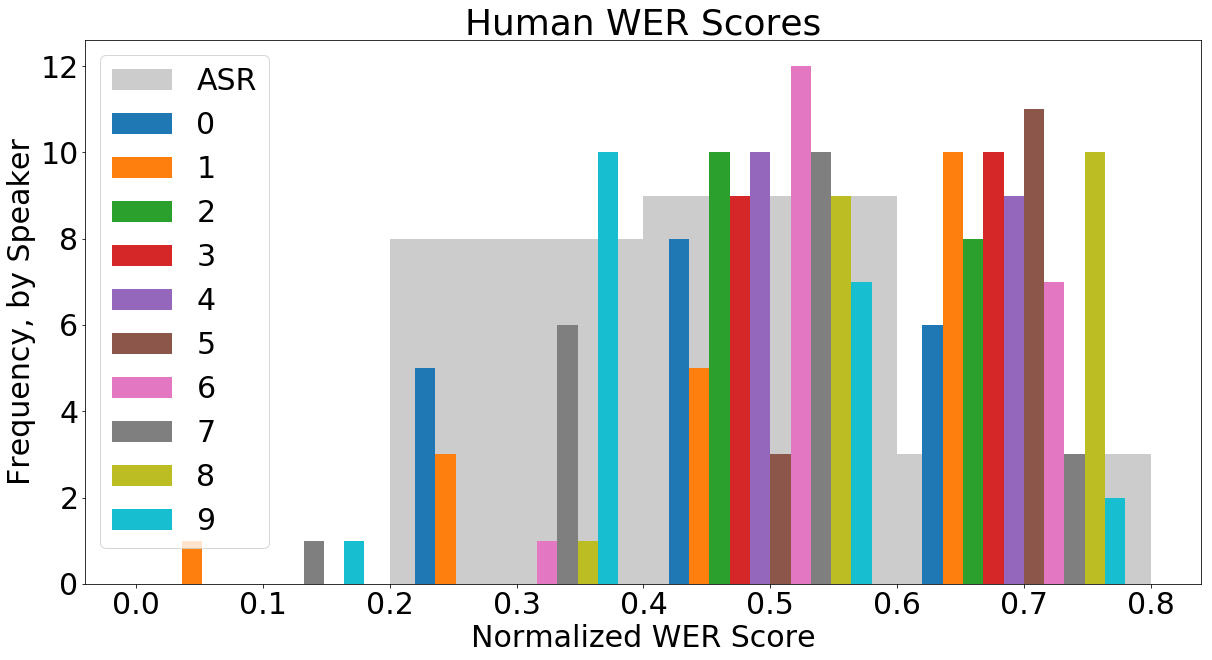

In [13]:
import matplotlib
matplotlib.rcParams.update({'font.size': 30})
import matplotlib.pyplot as plt
x = [x for x in range(1, 4)]
plt.figure(figsize=(20,10))

#line2 = plt.hist(tts)
#plt.legend((line1, line2), ("Human", "TTS"))
plt.hist(tts_wer, bins=[x/5 for x in range(0,5)], histtype = "stepfilled", color = '.8')
plt.hist(all_speaker_wer, bins=[x/5 for x in range(0,5)])
plt.legend(['ASR']+[x for x in range(10)])

plt.title("Human WER Scores")
plt.xlabel("Normalized WER Score")
plt.ylabel("Frequency, by Speaker")

plt.show()
#plt.hist(tts)
#plt.show()

## BLEU

In [14]:
def bleu_comparison(original, human):
    #print(human.lower().split())
    #print(original.lower().split())
    human_bleu = nltk.translate.bleu_score.sentence_bleu( [human.lower().split()], original.lower().split())
    return human_bleu

In [15]:
all_speaker = []
for i in range(10):
    print (i)
    with open(f'/Users/dpeskov/Downloads/HumanData/Speaker{i}.json') as fp:
        data = json.load(fp)
    
        questions = data['questions']

        human_data, single_speaker_bleu = [], []
        for index, sentences in enumerate(data['questions']):
            for sent_index, question in enumerate(sentences['sentences']):
                bleu = bleu_comparison(' '.join(question), original_data[index][sent_index])
                if bleu == 0:
                    print (question, original_data[index][sent_index])
                single_speaker_bleu.append(bleu)
            print(sum(single_speaker_bleu)/len(single_speaker_bleu))
        all_speaker.append(single_speaker_bleu)
            #bleu_comparison(question, )
            #print(' '.join(question['sentences'][0]))
            # extract all the relevant questions for given fold
            #if question['fold'] == 'guesstrain':
            #    human_data.append([question['text'],  question[

0
0.27236094460237054
0.26681763569569455
0.3119086418883985
0.32117908869619827
0.30999749655462244
1
0.22209019562737467
0.2196429793484044
0.290327941558296
0.30662646062294463
0.2841350096932035
2
0.2059538744304369
0.21298064579654805
0.21612779443828478
0.2355025708882099
0.2637191029840518
3
0.22595379033384694
0.22286945739270494
0.2375125107400585
0.26614014991146084
0.25833811828770104
4
0.26418628545558165
0.2471402116964287
0.26699983115873577
0.25695782605748074
0.2566142941999476
5
0.17146766019712129
0.17450688075012658
0.18554215914392574
0.20213702616713478
['<unk>', 'to', 'both', '<unk>'] this object appears between two boats tossing in a furious storm in the painting the great wave off kanagawa
0.1926573632595125
6
0.20543572028270757
0.2224149149546902
0.2620405706787659
0.2995318422225802
0.28689212031318645
7
0.29419228838826983
0.27529604970018234
0.3021994058408859
0.3111769928493279
0.31179024925454285
8
0.261487208161831
0.23365524011086425
0.2503533146407271


/Users/dpeskov/anaconda3/envs/ASR/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/dpeskov/anaconda3/envs/ASR/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/dpeskov/anaconda3/envs/ASR/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [16]:
with open(f'/Users/dpeskov/Downloads/HumanData/Speaker999.json') as fp:
    tts_bleu = []
    data = json.load(fp)
    questions = data['questions']
    human_data, single_speaker_bleu = [], []
    for index, sentences in enumerate(data['questions']):
        for sent_index, question in enumerate(sentences['sentences']):
            bleu = bleu_comparison(' '.join(question), original_data[index][sent_index])
            if bleu == 0:
                print (question, original_data[index][sent_index])
            single_speaker_bleu.append(bleu)
        print(sum(single_speaker_bleu)/len(single_speaker_bleu))
    tts_bleu.append(single_speaker_bleu)


0.3539887712969183
0.37936780287241806
0.3716703419205578
0.35543882346693934
0.34078399326466297


/Users/dpeskov/anaconda3/envs/ASR/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/dpeskov/anaconda3/envs/ASR/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [17]:
#run above code on range 999,1000 (file is speaker999)

with open(f'/Users/dpeskov/Downloads/HumanData/Speaker999.json') as fp:
    tts_wer = []
    data = json.load(fp)
    #human_data, single_speaker_bleu = [], []
    for index, sentences in enumerate(data['questions']):
        for sent_index, question in enumerate(sentences['sentences']):
            sent_wer = wer(original_data[index][sent_index], ' '.join(question))
            #print(original_data[index][sent_index])
            #print(' '.join(question))
            tts_wer.append(sent_wer)
#tts_wer

In [18]:
with open(f'/Users/dpeskov/Documents/PhD/QBASR_Files/HumanData_Original.json') as fp:
    data = json.load(fp)
        
    questions = data['questions']

    guesser_data = []
    for question in data['questions']:
        # extract all the relevant questions for given fold
        if question['fold'] == 'guesstrain':
            guesser_data.append([question['text'],  question['tokenizations'], question['page'], question['qanta_id']])

In [19]:
original_data = []
for i in range(5):
    print(guesser_data[i][3])
    tokens = guesser_data[i][1]
    single_question = []
    for token in tokens:
        single_question.append(guesser_data[i][0][token[0]:token[1]].lower().translate(str.maketrans('', '', string.punctuation)))
    original_data.append(single_question)

1
2
3
4
5


In [20]:
data = [] 
for text, tokens, page, qnum in guesser_data:
        for sent_count, token in enumerate(tokens):
            data.append([qnum, sent_count, text[token[0]:token[1]], page])

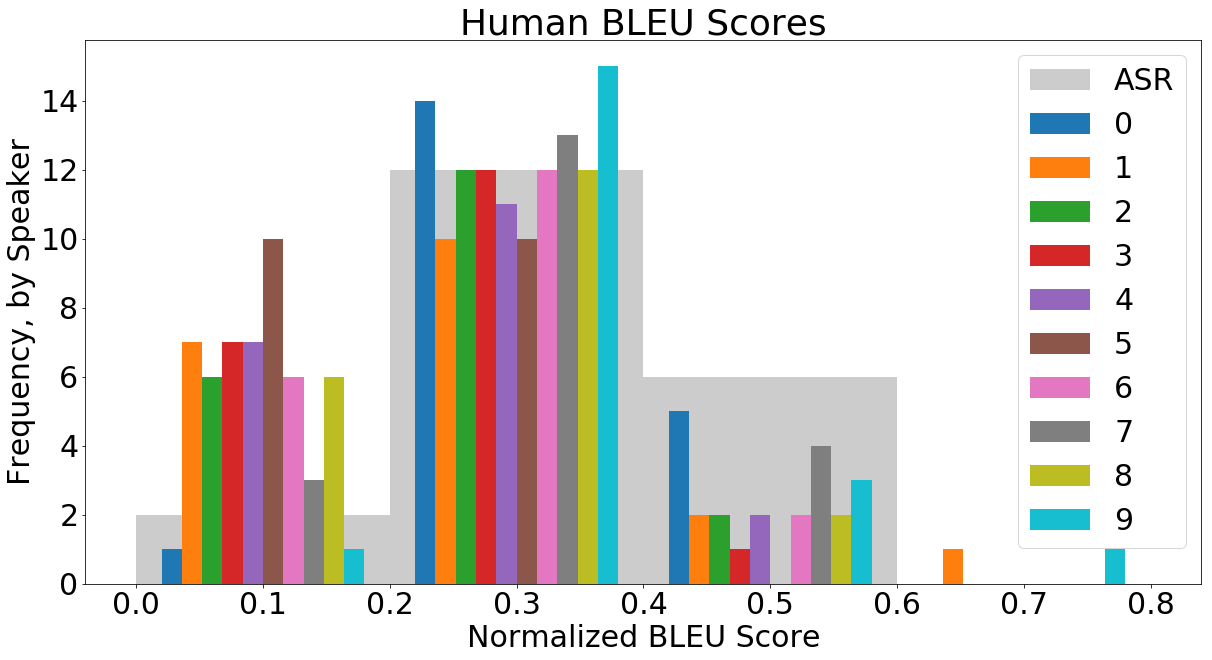

In [21]:
import matplotlib
matplotlib.rcParams.update({'font.size': 30})
import matplotlib.pyplot as plt
x = [x for x in range(1, 4)]
plt.figure(figsize=(20,10))

#line2 = plt.hist(tts)
#plt.legend((line1, line2), ("Human", "TTS"))
plt.hist(tts_bleu, bins=[x/5 for x in range(0,5)], histtype = "stepfilled", color = '.8')
plt.hist(all_speaker, bins=[x/5 for x in range(0,5)])
plt.legend(['ASR']+[x for x in range(10)])

plt.title("Human BLEU Scores")
plt.xlabel("Normalized BLEU Score")
plt.ylabel("Frequency, by Speaker")


plt.show()
#plt.hist(tts)
#plt.show()

### Extra Code

In [22]:
#test code to make sure bleu works properly
def bleu_comparison(original, human, tts):
    human_bleu = nltk.translate.bleu_score.sentence_bleu( [human.lower().split()], original.lower().split())
    tts_bleu = nltk.translate.bleu_score.sentence_bleu( [tts.lower().split()], original.lower().split())
    return human_bleu, tts_bleu

all_data = []

data_orig = "A public safety exclusion was added to the ruling in this Supreme Court case in New York v. Quarles, which concerned a man who discarded a firearm in a crowded grocery store."
data_human = "the public safety exclusion was added to the ruling invest supreme court case in new york versus cordless which concerned a man who discarded a firearm in a crowded grocery store"
data_tts = "a public safety at clues in with added to the <unk> the <unk> court case in new york city coral which concerned a man who discarded a firearm in a crowded grocery store"
all_data.append(bleu_comparison(data_orig, data_human, data_tts))


data_orig = "The Feynman Ratchet is a discredited perpetual motion machine that made use of this phenomenon in the form of heat fluctuations."
data_human = "defining in russia is it discredited perpetual emotion machine that made use of this phenomenon in the form of <unk>"
data_tts = "the <unk> the discredited perpetual motion machine that made you think of this phenomenon in the form of heat fluctuation "
bleu_comparison(data_orig, data_human, data_tts)
all_data.append(bleu_comparison(data_orig, data_human, data_tts))

data_orig = "this object appears in the back right of a painting that shows five workers moving grain around a watermill."
data_human = "this object appears in the back right as a painting that shows five workers moving green around a water and milk"
data_tts = "this object appears in the background of our painting that shows five workers moving grain around water mill "
bleu_comparison(data_orig, data_human, data_tts)
all_data.append(bleu_comparison(data_orig, data_human, data_tts))

In [23]:
## THERE ARE 2 sentences total in the dataset that make counts not match up caused by a tokenization issue in original data [468:469]

# q_counter = 0
# for q in clean_data:
#     if q['fold'] == 'guesstest':
#         sentences =  [item['sentences'] for item in asr_data]
#         if len(q['tokenizations']) != len(sentences[q_counter]):
#             print(q['tokenizations'], asr_q)
#             print(f"NEED TO REMOVE {q['qanta_id']} from data")
#         q_counter+=1

        
#these two q_ids need to removed from both clean and asr [130135, 106424]
#EXTRA CODE
#       
#             if (q['qanta_id'] in [130135, 106424]):
#                 if (sent[1]-sent[0] == 1):
#                     print ('caught')
#                     print(len(orig_s))
#                     continue
# 

# wers = []
# for index, q in enumerate(cleaned_s[:1000]):
#     calc = wer(orig_s[index], cleaned_s[index])
#     print(calc)
#     #if (calc > .8 or calc < .2):
#         #print(orig_p[index][:100], cleaned_p[index][:100])
#     wers.append(calc)
# sum(wers)/len(wers)

#not sure what for originally but in random cells:

#text = "This object appears in the back right of a painting that shows five workers moving grain around a watermill.  This object is rendered in bright red and beneath a light smattering of clouds in the painting South Wind, Clear Sky.  This object appears between two boats tossing in a furious storm in the painting The Great Wave off Kanagawa. Katsushika Hokusai created thirty six views of, For ten points, what Japanese landmark?  "
#tokenizer.span_tokenize(text)
#data[0][2]
#human = [.5, .55, .65, .66, .5, .4, .8,.75, .78,  .9, .55]
#human = sorted([score[0] for score in all_data])
#tts = sorted([score[1] for score in all_data])